Reading dataset and dropping columns and preprocessing
daily users of amphetamine, benzos, cannabis, heroin, ketamine, methadone + weekly users of heroin are considered at risk of addiction (indicated with 1 otherwise 0)
optionally scores for traits are divided in low (-1), medium (0), high (1)


In [16]:
import csv
import exploratory_analysis_plots

In [10]:


# Dictionary of scores with mean, standard deviation, minimum, and maximum values for traits
scores = {
    "Nscore": (0.00004, 0.99808, -3.46436, 3.27393),
    "Escore": (0.00016, 0.99745, -3.27393, 3.27393),
    "Oscore": (-0.00053, 0.99623, -3.27393, 2.90161),
    "Ascore": (-0.00024, 0.99744, -3.46436, 3.46436),
    "Cscore": (-0.00039, 0.99752, -3.46436, 3.46436),
    "Impulsiveness": (0.00721, 0.95446, -2.55524, 2.90161),
    "Sens_seeking": (-0.00329, 0.96370, -2.07848, 1.92173),
}

scores_indexed = enumerate(scores)


# Function to read  dataset
def read_text_dataset(file_path):
    with open(file_path, "r") as file:
        dataset = [line.strip().split(",") for line in file.readlines()]

    return dataset


# Function to write dataset to another text file
def write_to_file(dataset, output_file):
    with open(output_file, "w", newline="") as file:
        writer = csv.writer(file)
        writer.writerows(dataset)


# keep only personality scores, amphetamine, benzos, cannabis, heroin, ketamine, methadone, serm columen
def drop_columns(dataset):
    for row in dataset:
        for column_index in sorted(
            [1, 2, 3, 4, 5, 13, 15, 17, 19, 20, 21, 22, 25, 26, 28, 29, 31],
            reverse=True,
        ):
            del row[column_index]


# binary values for
def binary_variables_drug_use(dataset):
    for row in dataset:
        for i in range(8, 14):
            # consider weekly heroin users as at risk of addiction
            if i == 11 and row[i] == "CL5":
                row[11] = 1
            # daily users
            elif row[i] == "CL6":
                row[i] = 1
            else:
                row[i] = 0

        # flag all the people that claim to have used the fictional drug
        if row[14] != "CL0":
            row[14] = 1
        else:
            row[14] = 0


def binary_variables_traits(dataset):
    for row in dataset:
        for idx, (key, value) in enumerate(scores.items()):
            mean = value[0]
            stand_dev = value[1]

            # all the high scores are the ones above mean + sd
            if float(row[idx + 1]) > mean + stand_dev:
                # medium scores are the ones in the range mean+- sd
                row[idx + 1] = 1
            elif (
                float(row[idx + 1]) < mean + stand_dev
                and float(row[idx + 1]) > mean - stand_dev
            ):
                row[idx + 1] = 0
            # low scores are the ones in the below mean + sd
            else:
                row[idx + 1] = -1


# Input text dataset file path
input_file_path = "drug_consumption.txt"

# Output CSV file path
output_csv_path = "drug_consuption_2.txt"

# Read text dataset
dataset = read_text_dataset(input_file_path)

# drop columns that are not used
drop_columns(dataset)

# for converting drug use to 0 not risk of addiction 1 risk of addiction
binary_variables_drug_use(dataset)


# for converting traits in -1 low score, 0 medium score, 1 high score
# binary_variables_traits(dataset)

# Write dataset in a new file
write_to_file(dataset, output_csv_path)
dataset_new = read_text_dataset("drug_consuption_2.txt")

Bar plot for users of each drug 

In [19]:
categories = ["Amphet", "Benzo", "Cannabis", "Heroin", "Ketamine", "Methadone"]

exploratory_analysis_plots.Plots.histogram_DrugUse(dataset_new, categories)

exploratory_analysis_plots.Plots.piechart_extraversion(dataset_new)

exploratory_analysis_plots.Plots.piechart_extr_subst(dataset_new, categories)

exploratory_analysis_plots.Plots.histograms_personality_density(dataset, scores)

TypeError: Plots.histogram_DrugUse() takes 1 positional argument but 2 were given

[101, 95, 458, 29, 4, 73]
[102, 95, 463, 29, 4, 73]


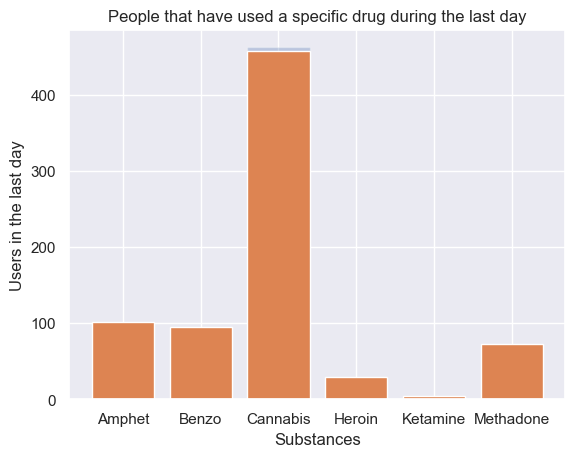

In [146]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="darkgrid")
total_nr_signs = 0
nr_images = 0
categories = ["Amphet", "Benzo", "Cannabis", "Heroin", "Ketamine", "Methadone"]
variables = [0, 0, 0, 0, 0, 0]
variables_overclaiming = [0, 0, 0, 0, 0, 0]


num_categories = len(categories)


bar_width = 0.10
bar_positions = np.arange(num_categories)


diff = {}
for row in dataset_new:
    for i in range(8, 14):
        # daily users who do not claim to have used the fictional drug
        if row[i] == "1" and row[14] != "1":
            variables[i - 8] += 1
            variables_overclaiming[i - 8] += 1

        # users who claims to have used the fictional drug
        elif row[i] == "1" and row[14] == "1":
            variables_overclaiming[i - 8] += 1


print(variables)
print(variables_overclaiming)


plt.bar(
    bar_positions,
    variables_overclaiming,
    alpha=0.3,
)


plt.bar(
    bar_positions,
    variables,
    alpha=1.0,
)

plt.xticks(ticks=range(len(categories)), labels=categories)


plt.xlabel("Substances")
plt.ylabel("Users in the last day")
plt.title("People that have used a specific drug during the last day")

plt.show()

Pie chart extraversion scores 

(-1.099999219094978,
 1.0999974282164653,
 -1.099995951064149,
 1.0999996823864107)

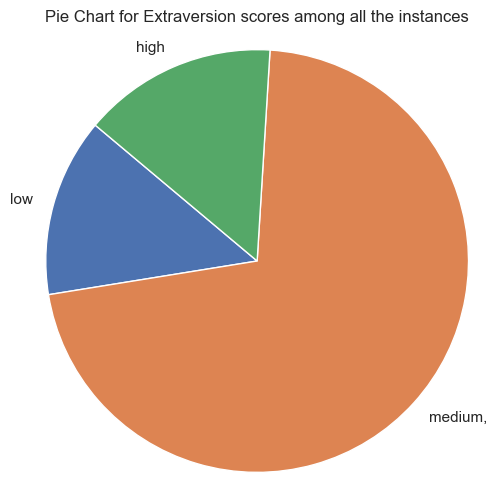

In [147]:
from collections import Counter

extraversion_values = []
values = [0, 0, 0]
for row in dataset_new:
    extraversion_values.append(float(row[2]))

    for e in extraversion_values:
        if e < 0.00016 - 0.99745:
            values[0] += 1
        elif e <= 0.00016 + 0.99745 and e >= 0.00016 - 0.99745:
            values[1] += 1
        elif e > 0.00016 + 0.99745:
            values[2] += 1


class_counts = Counter(extraversion_values)

class_labels = ["low", "medium,", "high"]
plt.figure(figsize=(6, 6))
plt.pie(values, labels=class_labels, startangle=140)
plt.title("Pie Chart for Extraversion scores among all the instances")
plt.axis("equal")

Pie charts extraversion scores among users of a specific substance 

the medium range in calculated considering mean+/-standard deviation


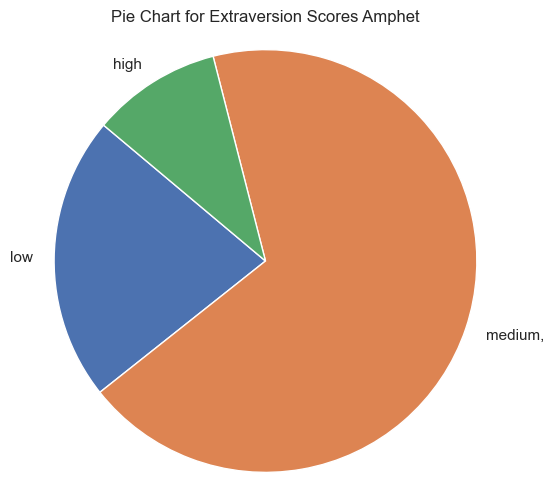

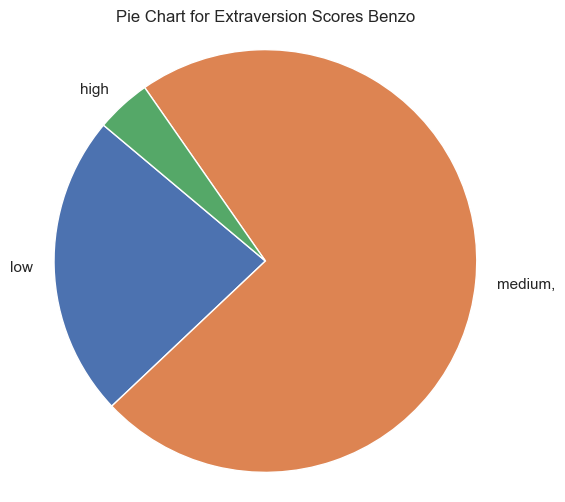

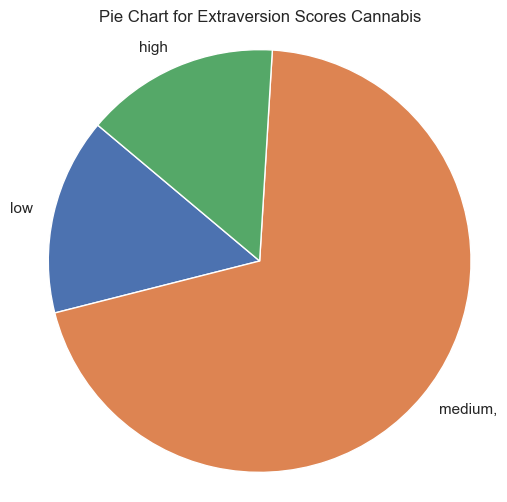

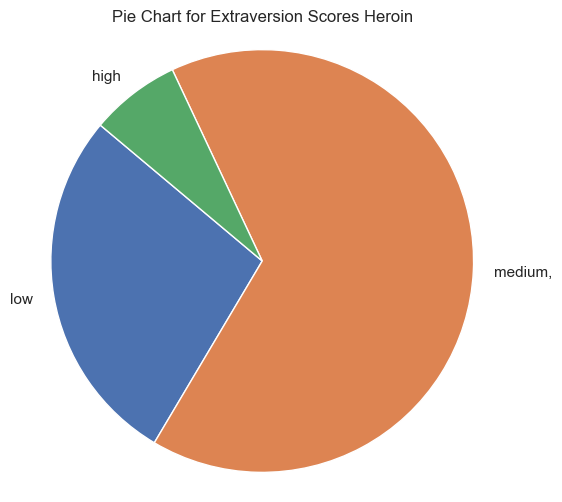

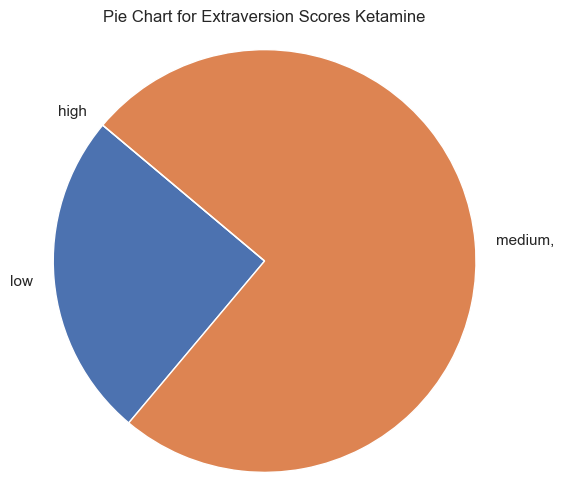

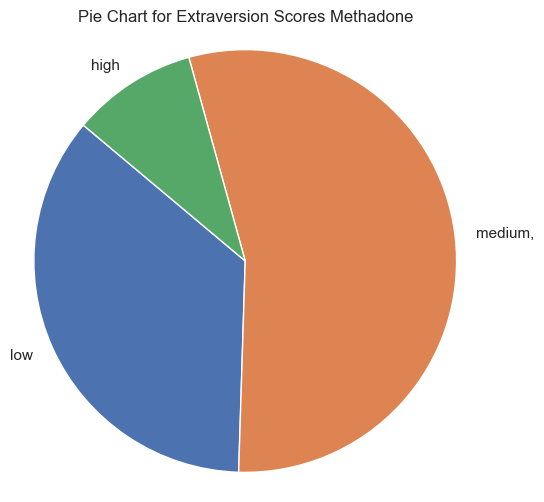

In [148]:
from collections import Counter


j = 0
for i in range(8, 14):
    extraversion_values = []
    values = [0, 0, 0]
    for row in dataset_new:
        if row[i] == "1" and row[14] == "0":
            extraversion_values.append(float(row[2]))

    for e in extraversion_values:
        if e < 0.00016 - 0.99745:
            values[0] += 1
        elif e <= 0.00016 + 0.99745 and e >= 0.00016 - 0.99745:
            values[1] += 1
        elif e > 0.00016 + 0.99745:
            values[2] += 1

    class_counts = Counter(extraversion_values)

    class_labels = ["low", "medium,", "high"]
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=class_labels, startangle=140)
    plt.title("Pie Chart for Extraversion Scores " + categories[j])
    plt.axis("equal")
    j += 1

[0.31287, -0.67825, -0.46725, -0.14882, 0.73545, -0.67825, -0.46725, 0.62967, -0.24649, -0.79151, -0.92104, 0.52135, -0.34799, -0.79151, 0.41667, -0.14882, -0.79151, -0.05188, 0.52135, 0.04257, 0.31287, -0.79151, 0.41667, -0.24649, -0.24649, 0.31287, -0.24649, 0.04257, 0.82562, -0.14882, -0.92104, -0.46725, 0.31287, 0.13606, 0.82562, -0.14882, 0.04257, 0.04257, 0.04257, -0.58016, 0.22393, -0.46725, -0.58016, 0.73545, -0.34799, -0.92104, -0.05188, -0.34799, -0.46725, -0.67825, -0.14882, -0.34799, 0.13606, -0.79151, -0.34799, 0.04257, -0.79151, -0.34799, -0.46725, 0.73545, -0.92104, 0.31287, 0.91093, 0.41667, -0.14882, -0.67825, -0.46725, 0.13606, -0.46725, -0.67825, -0.58016, -0.58016, 0.04257, -0.92104, 0.13606, -0.46725, -0.79151, -0.14882, 0.31287, 0.04257, 0.22393, 0.62967, -0.34799, 0.22393, 0.22393, -0.34799, -0.46725, -0.34799, 0.04257, -0.79151, 0.91093, -0.24649, -0.05188, -0.14882, -0.46725, -0.05188, -0.79151, -0.46725, 0.13606, -0.46725, 0.22393, -0.58016, -0.05188, -0.79151

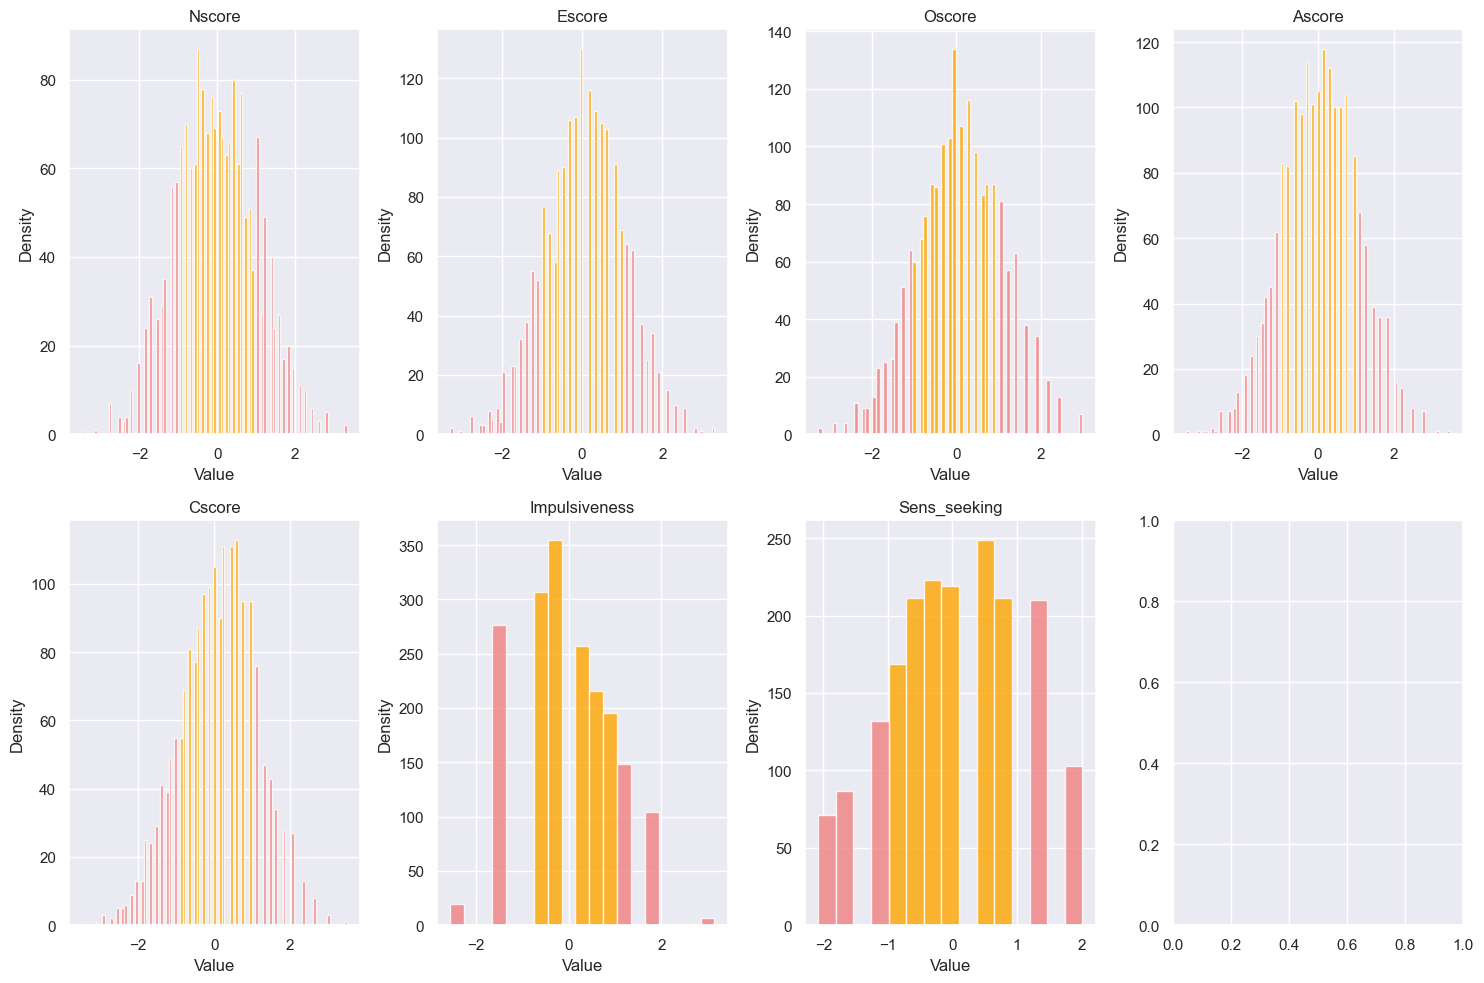

In [149]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

for idx, ((score, (mean, std_dev, min_val, max_val)), ax) in enumerate(
    zip(scores.items(), axes.flatten())
):
    samples = [float(row[idx + 1]) for row in dataset]

    num_unique_elem = len(set(samples))

    # set number of bars and bar width

    bar_width = 3 / num_unique_elem
    num_bins = int((max_val - min_val) / bar_width) + 1
    bins = [min_val + i * bar_width for i in range(num_bins + 1)]

    # Filter values within one standard deviation
    in_range = [val for val in samples if mean - std_dev <= val <= mean + std_dev]

    # Filter values outside one standard deviation
    out_range = [val for val in samples if val < mean - std_dev or val > mean + std_dev]

    # Plot bars within one standard deviation in one color
    ax.hist(in_range, bins=bins, alpha=0.8, color="orange")
    print(in_range)
    # Plot bars outside one standard deviation in another color
    ax.hist(out_range, bins=bins, alpha=0.8, color="lightcoral")

    ax.set_title(score)
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.grid(True)

plt.tight_layout()
plt.show()